In [49]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from PIL import Image
import matplotlib.pyplot as plt

Training On Data2 and Data4 without Data Generator. Validating on Data3

In [50]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), data_format = 'channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [51]:
train_dir = "../data2+4"
val_dir = "../data3"
save_dir = "../models"

In [52]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1/255.0)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (200, 200),
                                                   batch_size = batch_size,
                                                    shuffle=True,
                                                   class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size = (200, 200),
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical')

Found 38050 images belonging to 5 classes.
Found 7490 images belonging to 5 classes.


In [53]:
model.fit_generator(generator = train_generator,
                    steps_per_epoch = 2000//batch_size,
                    epochs = 50,
                    validation_data = validation_generator,
                    validation_steps = 600//batch_size)

model.save_weights(save_dir + "/sec_model.h5")

Epoch 1/50
62/62 [==============================] - 31s 498ms/step - loss: 1.5086 - acc: 0.3342 - val_loss: 1.4766 - val_acc: 0.4080
Epoch 2/50
62/62 [==============================] - 29s 466ms/step - loss: 1.2572 - acc: 0.4718 - val_loss: 1.2372 - val_acc: 0.4861
Epoch 3/50
62/62 [==============================] - 29s 467ms/step - loss: 0.9842 - acc: 0.6094 - val_loss: 1.0727 - val_acc: 0.5451
Epoch 4/50
62/62 [==============================] - 29s 468ms/step - loss: 0.7238 - acc: 0.7268 - val_loss: 0.7152 - val_acc: 0.6823
Epoch 5/50
62/62 [==============================] - 29s 468ms/step - loss: 0.5569 - acc: 0.7928 - val_loss: 0.4980 - val_acc: 0.8507
Epoch 6/50
62/62 [==============================] - 29s 470ms/step - loss: 0.5474 - acc: 0.8014 - val_loss: 0.6813 - val_acc: 0.6684
Epoch 7/50
62/62 [==============================] - 29s 473ms/step - loss: 0.4187 - acc: 0.8443 - val_loss: 0.3068 - val_acc: 0.9288
Epoch 8/50
62/62 [==============================] - 29s 468ms/step - 

In [54]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

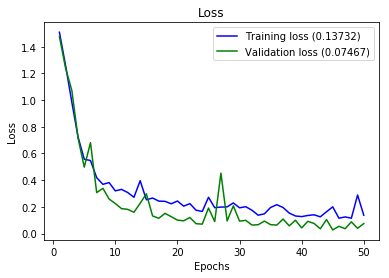

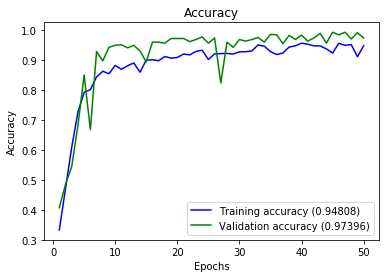

In [55]:
plot_history(model.history)